<img src="https://user-images.strikinglycdn.com/res/hrscywv4p/image/upload/c_limit,fl_lossy,h_300,w_300,f_auto,q_auto/1266110/Logo_wzxi0f.png" style="float: left; margin: 20px; height: 55px">

**Your heart is free. Have the courage to follow it - [Braveheart](https://en.wikipedia.org/wiki/Braveheart)**

# Chapter 4 Cummulative distribution function

## The limits of PMFs

PMFs work well if the number of values is small. But as the number of values increases, the probability associated with each value gets smaller and the effect of random noise increases.

For example, we might be interested in the distribution of birth weights. In the NSFG data, the variable `totalwgt_lb` records weight at birth in pounds.

Create 2 PMF comparing this values between `first_babies` and `others`:

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from Resources.Think_Stats.Thinkstats2 import thinkplot
from Resources.Think_Stats.Thinkstats2 import thinkstats2
from Resources.Think_Stats.Thinkstats2 import nsfg
import pandas as pd
%matplotlib inline

In [3]:
preg = nsfg.ReadFemPreg(dct_file='Resources/Think_Stats/Thinkstats2/2002FemPreg.dct',
                      dat_file='Resources/Think_Stats/Thinkstats2/2002FemPreg.dat.gz',
                       clean = True)

preg1 = preg[(preg['birthord'] == 1) & (preg['outcome'] == 1)]
preg2 = preg[(preg['birthord'] != 1) & (preg['outcome'] == 1)]

In [4]:
a = thinkstats2.Pmf(preg1['totalwgt_lb'])

In [8]:
b = thinkstats2.Pmf(preg2['totalwgt_lb'])

In [ ]:
thinkplot.Hist()

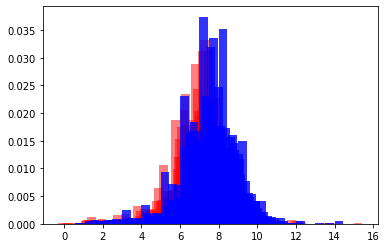

In [19]:
width = 0.45
thinkplot.Hist(a, align='right', width = width, label = 'first babies', color = 'red', alpha =0.5)
thinkplot.Hist(b, align='left', width = width, label = 'others', color ='blue', alpha=0.8)

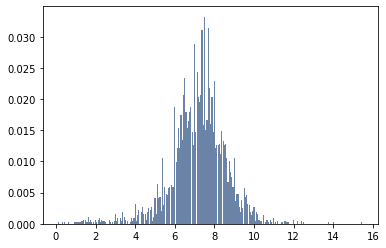

In [11]:
thinkplot.Hist(a)

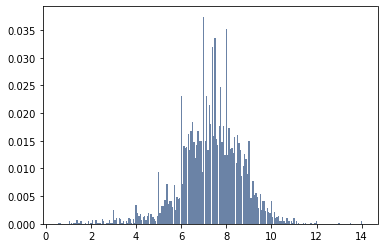

In [9]:
thinkplot.Hist(b)

Compute the PMFs with the `thinkstats2` method `.Pmf()`:

In [ ]:
# Code here

Plot them with `thinkplot.Hist()`:

In [ ]:
# Code here

Overall, these distributions resemble the bell shape of a normal distribution, with many values near the mean and a few values much higher and lower.

But parts of this figure are hard to interpret. There are many spikes and valleys, and some apparent differences between the distributions. It is hard to tell which of these features are meaningful. Also, it is hard to see overall patterns; for example, which distribution do you think has the higher mean?

These problems can be mitigated by binning the data; that is, dividing the range of values into non-overlapping intervals and counting the number of values in each bin. Binning can be useful, but it is tricky to get the size of
the bins right. If they are big enough to smooth out noise, they might also smooth out useful information.

An alternative that avoids these problems is the cumulative distribution function (CDF), which is the subject of this chapter. But before I can explain CDFs, We need to understand percentiles.

## Percentiles

If you have taken a standardized test, you probably got your results in the form of a raw score and a percentile rank. In this context, the **percentile rank** is the fraction of people who scored lower than you (or the same). So if you are “in the 90th percentile,” you did as well as or better than 90% of
the people who took the exam.

Compute the percentile rank of a value, `your_score`, relative to the values in the sequence scores. To do so create a function call `percentile_rank()`:

In [37]:
your_score = 88
scores1 = [55, 66, 77, 88, 99]

In [42]:
scores = pd.Series(scores)

In [34]:
def percentil_rank(lista, valor):
    longitud = len(lista)
    valor_inferior = 0
    for elemento in lista:
        if (valor > elemento) or (valor == elemento):
            valor_inferior += 1
    return(valor_inferior/longitud)

            
    
    

In [38]:
percentil_rank(scores1, your_score)

0.8

If you are given a value, it is easy to find its percentile rank; going the other way is slightly harder. If you are given a percentile rank and you want to find the corresponding value, one option is to sort the values and search for the one you want.

What is the 50th percentile value of the list above? To do so create a function call `percentile()`:


In [39]:
scores2 = [55, 88, 66, 77, 88, 99]

In [ ]:
def percentil(lista, perc_rnk):
    percentil_rank(lista, )


The difference between “percentile” and “percentile rank” can be confusing, and people do not always use the terms precisely. To summarize, `percentile_rank()` takes a value and computes its percentile rank in a set of values; `percentile()` takes a percentile rank and computes the corresponding value.

## CDFs

Now that we understand percentiles and percentile ranks, we are ready to tackle the **cumulative distribution function** (CDF). The CDF is the function that maps from a value to its percentile rank.

The CDF is a function of x, where x is any value that might appear in the distribution. To evaluate CDF(x) for a particular value of x, we compute the fraction of values in the distribution less than or equal to x.

Calculate a dictionary with the CDF values of the list [1, 2, 2, 3, 5]

We need to calculate the CDF for any value of x, not just values that appear in the sample. If x is less than the smallest value in the sample, CDF(x) is 0.

Hint: The function is almost identical to `PercentileRank`, except that the result is a probability in the range 0–1 rather than a percentile rank in the range 0–100.

In [ ]:
# Code here

## Representing CDFs

Plot the CDF from the list above:

- from the dictionary created above
- from the initial list creating a series and using the method: `ser.hist(cumulative=True, density=1, bins=100)`


In [ ]:
# Dictionary way

In [ ]:
# Whit the series.method

Calculate and plot the CDF of `pregnancy length`:

In [ ]:
# Code here

In the same graph, plot the CDF of of `pregnancy length` for `first_babies` and `others`:

In [ ]:
# Code here

Compare your results with the graph calculated with the `thinkstats2.Cdf()` function and plot it with `thinkplot.Cdf()`.

In [ ]:
# Code here

## Comparing CDFs

CDFs are especially useful for comparing distributions.Plot and compare the CDF of the birth weight for `first_babies` and `others`.

In [ ]:
# Code here

## Percentile-based statistics

Once you have computed a CDF, it is easy to compute percentiles and percentile ranks. The Cdf class provides these two methods:

- `PercentileRank(x)`: Given a value x, computes its percentile rank, 100 · CDF(x).
- `Percentile(p)`: Given a percentile rank p, computes the corresponding value, x. Equivalent to Value(p/100).

Try them:

In [ ]:
# Code here

**Percentile** can be used to compute percentile-based summary statistics. For example, the 50th percentile is the value that divides the distribution in half, also known as the **median**. Like the mean, the median is a measure of
the central tendency of a distribution.

Actually, there are several definitions of “median,” each with different properties. But Percentile(50) is simple and efficient to compute.

Another percentile-based statistic is the interquartile range (IQR), which is a measure of the spread of a distribution. The IQR is the difference between the 75th and 25th percentiles.

More generally, percentiles are often used to summarize the shape of a distribution. For example, the distribution of income is often reported in “quintiles”; that is, it is split at the 20th, 40th, 60th and 80th percentiles. Other distributions are divided into ten “deciles”. Statistics like these that represent equally-spaced points in a CDF are called quantiles.

## Random Numbers

Suppose we choose a random sample from the population of live births and look up the percentile rank of their birth weights. Now suppose we compute the CDF of the percentile ranks. What do you think the distribution will
look like?

**Answer**:

Here’s how we can compute it. First, we make the Cdf of birth weights:

In [ ]:
weights = live.totalwgt_lb
cdf = thinkstats2.Cdf(weights, label ='totalwgt_lb')

Then we generate a sample and compute the percentile rank of each value in the sample.

In [ ]:
sample = np.random.choice(weights, 100, replace = True)
ranks = [cdf.PercentileRank(x) for x in sample]

`sample` is a random sample of 100 birth weights, chosen with replacement; that is, the same value could be chosen more than once. ranks is a list of percentile ranks.
Finally we make and plot the Cdf of the percentile ranks.

In [ ]:
rank_cdf = thinkstats2.Cdf(ranks)
plt.figure(figsize=(10,7))
thinkplot.Cdf(rank_cdf)
thinkplot.Show(xlabel ='percentile rank', ylabel ='CDF')

That outcome might be non-obvious, but it is a consequence of the way the CDF is defined. What this figure shows is that 10% of the sample is below the 10th percentile, 20% is below the 20th percentile, and so on, exactly as we should expect.

So, regardless of the shape of the CDF, the distribution of percentile ranks is uniform. This property is useful, because it is the basis of a simple and efficient algorithm for generating random numbers with a given CDF. Here’s
how:

- Choose a percentile rank uniformly from the range 0–100.
- Use `Cdf.Percentile()` to find the value in the distribution that corresponds to the percentile rank you chose.

Cdf provides an implementation of this algorithm, called `Random()`.

Cdf also provides `Sample()`, which takes an integer, n, and returns a list of n values chosen at random from the Cdf.

Try them:

In [ ]:
# Code here

## Comparing percentile ranks

Percentile ranks are useful for comparing measurements across different groups. For example, people who compete in foot races are usually grouped by age and gender. To compare people in different age groups, you can convert race times to percentile ranks.

Given position 200th leanest baby, how will you compute the percentile rank of a baby, knowing there are 1345 babies:

In [ ]:
# Code here

In the group of 1345 babies `first_babies` what is the position of the 15% weitgh percentile rank.

In [ ]:
# Code here

What is the weight of the babies that are not firts in the percentile rank 90, used the dataframe that you created at the begining

In [ ]:
# Code here